In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from sklearn.metrics import r2_score

In [96]:
NUM_EPOCH = 500

In [154]:
def format_df(df):
    df = df.drop(columns=['Address', 'Description'])
    df = df.astype('float64')
    # test
    df = df.drop(columns=['YearBuilt', 'ParkingPrice'])
    
    return df
    

def load_file():
    train_file = 'all_train.csv'
    test_file = 'all_test.csv'
    
    df_train = pd.read_csv(train_file, header=0, sep=',', quotechar='"', dtype=object, keep_default_na=True)
    df_test = pd.read_csv(test_file, header=0, sep=',', quotechar='"', dtype=object, keep_default_na=True)
    
    df_train = format_df(df_train)
    df_test = format_df(df_test)
    
    y_train = df_train['Price']
    X_train = df_train.drop(columns=['Price'])
    
    y_test = df_test['Price']
    X_test = df_test.drop(columns=['Price'])
    
    return X_train, X_test, y_train, y_test
    
def initialize_model(num_feature):
    
    model = Sequential()
#     model.add(Dense(num_feature, activation='relu'))
#     model.add(Dense(num_feature, activation='relu'))
#     model.add(Dense(num_feature, activation='relu'))

    model.add(Dense(32, activation='relu', input_dim=num_feature))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
#     model.compile(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_absolute_error')
    return model

def train_model(model, X_train, y_train):
    model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=NUM_EPOCH, verbose=0)
#     model.summary()
    return model
    
def predict_model(model, X_test):
    return model.predict(X_test)
    

    
X_train, X_test, y_train, y_test = load_file()
num_feature = len(X_train.columns)

print('#features = %d' % (num_feature))

model = initialize_model(num_feature)
model = train_model(model, X_train, y_train)

y_predict = predict_model(model, X_test)
y_actual = y_test.values

print('Done')

#features = 9
Done


0.6551406359100993


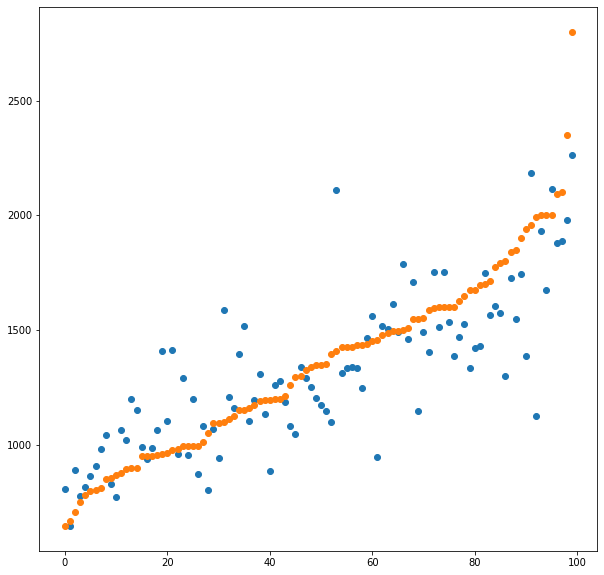

In [155]:
def plot_result(y_predict, y_actual):
    x = np.arange(len(y_predict))
    plt.figure(figsize=(10,10))
    
    y_actual_index = y_actual.argsort()
    sorted_y_predict = y_predict[y_actual_index]
    sorted_y_actual = y_actual[y_actual_index]
    
    plt.scatter(x, sorted_y_predict)
    plt.scatter(x, sorted_y_actual)
    plt.plot()
    
plot_result(y_predict, y_actual)
print(r2_score(y_true=y_actual, y_pred=y_predict))